In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target


In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(X,Y,random_state=2)

In [8]:
from sklearn import metrics

In [9]:
sv=SVC()
sv.fit(xtr,ytr)
ypr=sv.predict(xte)
print(metrics.accuracy_score(yte,ypr))

0.9736842105263158


C:\Users\mrb97\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Kernel methods

In [10]:
from sklearn import svm

In [19]:
X= iris.data[:,:2]
Y=iris.target
c=1

In [20]:
svc=svm.SVC(kernel='linear',C=c).fit(X,Y)

In [21]:
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=c).fit(X,Y)

In [22]:
poly_svc = svm.SVC(kernel='poly', degree=3,C=c).fit(X, Y)

C:\Users\mrb97\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
lin_svc = svm.LinearSVC(C=c).fit(X,Y)

C:\Users\mrb97\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
#to develop meshgrid for us to draw the models
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

#step size for this mesh 
h=0.02

In [36]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [39]:
np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

[array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        ...,
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
        [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]]),
 array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
        [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
        [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
        ...,
        [5.34, 5.34, 5.34, ..., 5.34, 5.34, 5.34],
        [5.36, 5.36, 5.36, ..., 5.36, 5.36, 5.36],
        [5.38, 5.38, 5.38, ..., 5.38, 5.38, 5.38]])]

In [40]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

C:\Users\mrb97\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: linewidths is ignored by contourf
C:\Users\mrb97\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: linewidths is ignored by contourf
C:\Users\mrb97\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: linewidths is ignored by contourf
C:\Users\mrb97\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: linewidths is ignored by contourf


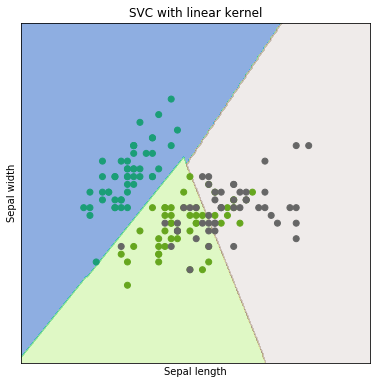

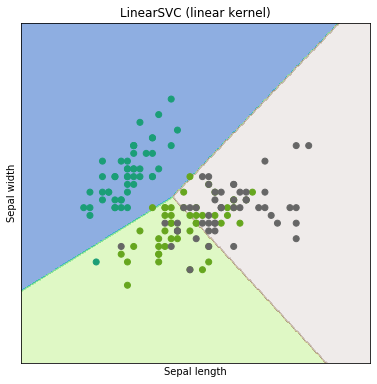

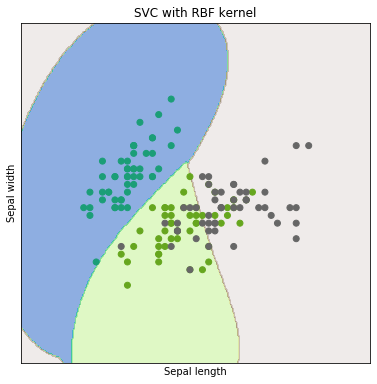

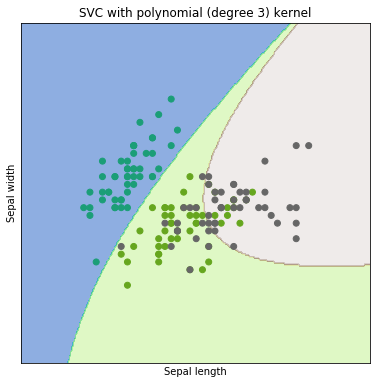

In [41]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])